In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# To Read out 100 rows rather than the default value. 
pd.set_option('display.max_rows', 1000)

In [4]:
# Importing the main data
df = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj1_plti.csv', header = 0)

print('Size: ')
print(df.shape)

Size: 
(146294, 25)


In [5]:
df2 = df.iloc[:, 0:15]
df1 = df2[df2.isnull().any(axis=1)]
df2 = df2.drop(df1.index.values)
print(df2.shape)

X = df2.iloc[:,1:14]
Y = df2.iloc[:,14]

(146257, 15)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(117005, 13) (117005,)
(29252, 13) (29252,)


In [7]:
abc = AdaBoostClassifier(n_estimators=100)
start = time.time()
abc_scores = cross_val_score(abc, X, Y, cv=5)
end = time.time()
print(end - start)
abc_scores.mean() 

169.15214610099792


0.8809629081415544

In [8]:
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
start = time.time()
etc_scores = cross_val_score(etc, X, Y, cv=5)
end = time.time()
print(end - start)
etc_scores.mean()

11.05936336517334


0.8628919998800064

In [9]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
start = time.time()
rfc_scores = cross_val_score(rfc, X, Y, cv=5)
end = time.time()
print(end - start)
rfc_scores.mean() 

26.551013946533203


0.8753631500741932

In [10]:
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
start = time.time()
dtc_scores = cross_val_score(dtc, X, Y, cv=5)
end = time.time()
print(end - start)
dtc_scores.mean()  

20.265926837921143


0.8356590864839262

In [11]:
start = time.time()
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
end = time.time()
print(end - start)
gbc.score(X_test, Y_test)  

38.43350434303284


0.884657459319021

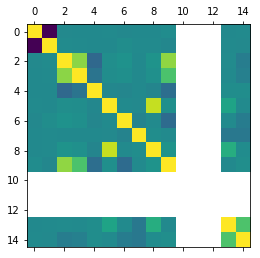

In [13]:
plt.matshow(df2.corr())